<a href="https://colab.research.google.com/github/josephtrill/CSST102_TRILLANA_BSCS-3A/blob/main/3A_TRILLANA_EXER1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratory Exercise 1: Linear Regression Implementation**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
df = pd.read_csv('datasets_house_prices.csv')

**Data Exploration**

In [7]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Size (sqft)                    1000 non-null   int64  
 1   Bedrooms                       1000 non-null   int64  
 2   Age                            1000 non-null   int64  
 3   Proximity to Downtown (miles)  1000 non-null   float64
 4   Price                          1000 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 39.2 KB
None
       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.546139   
min     801.000000     1.000000     0.000000                       0.500343   
25%    1629.500000     2

<ipython-input-20-701d8c77f58d>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Bedrooms', y='Price', ci=None, color='pink')


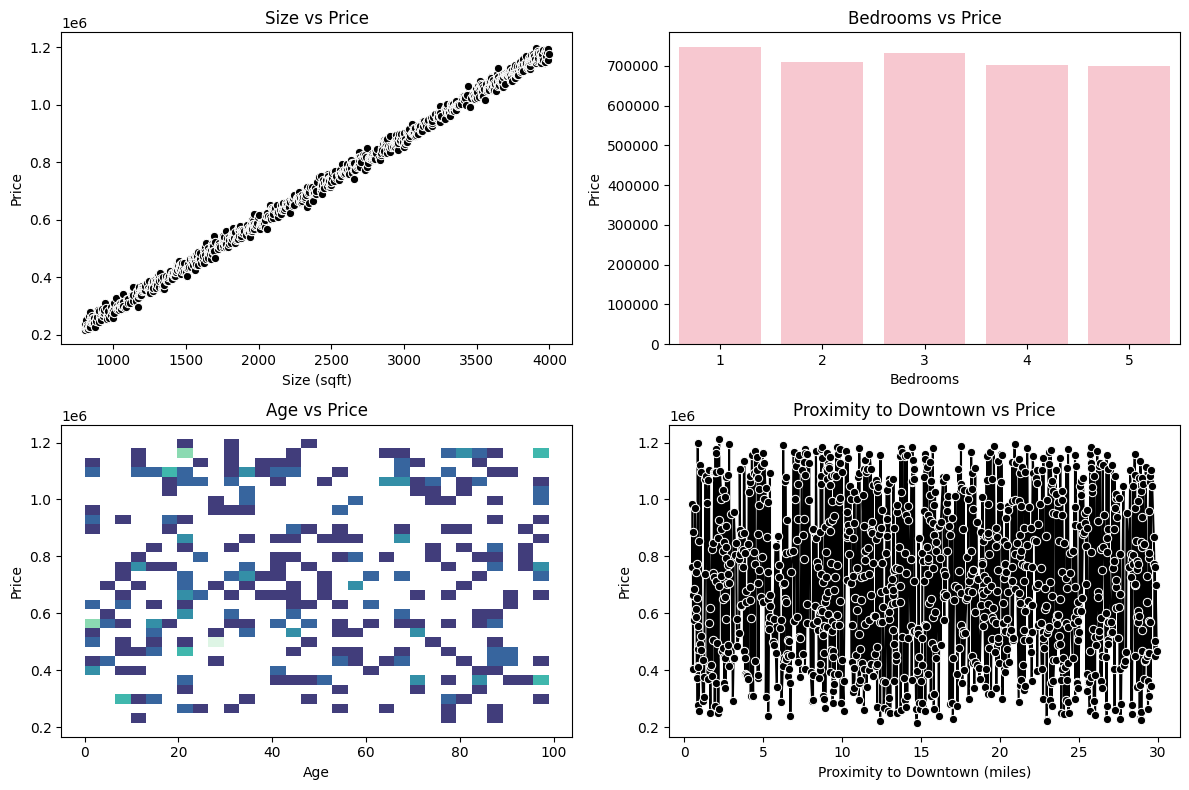

In [20]:
plt.figure(figsize=(12, 8))

# Line plot
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='Size (sqft)', y='Price', marker='o', color='black')
plt.title('Size vs Price')

# Bar plot
plt.subplot(2, 2, 2)
sns.barplot(data=df, x='Bedrooms', y='Price', ci=None, color='pink')
plt.title('Bedrooms vs Price')

# Histogram
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Age', y='Price', bins=30, pthresh=.05, cmap="mako")
plt.title('Age vs Price')

# Line plot
plt.subplot(2, 2, 4)
sns.lineplot(data=df, x='Proximity to Downtown (miles)', y='Price', marker='o', color='black')
plt.title('Proximity to Downtown vs Price')

plt.tight_layout()
plt.show()

<ipython-input-14-0f96d2613813>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price'], shade=True,  color='red')


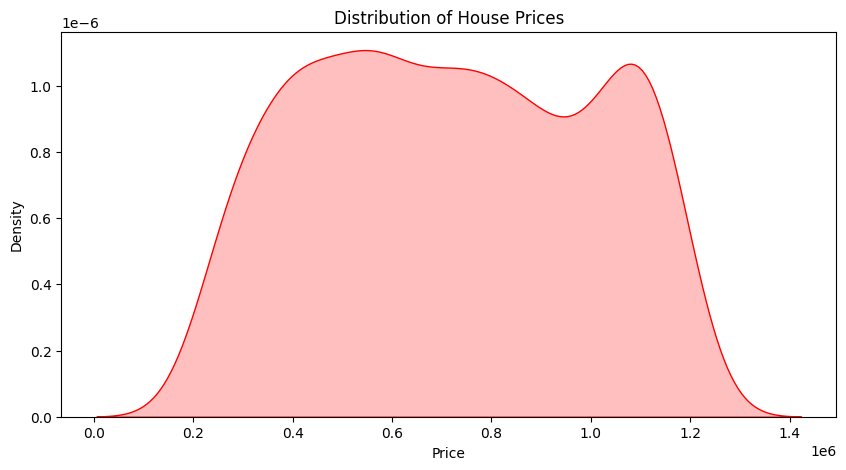

In [14]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Price'], shade=True,  color='red')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

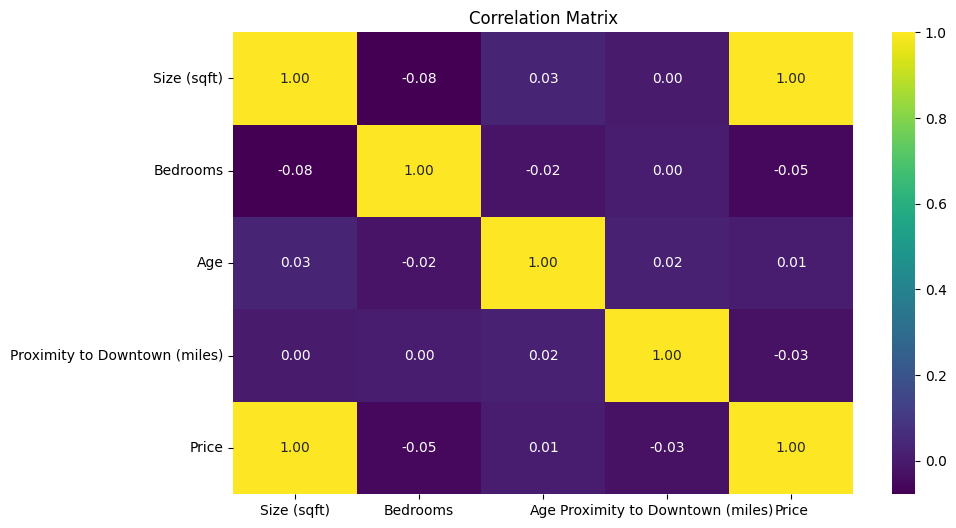

In [21]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

**1. Data Preprocessing:**

In [22]:
df.fillna(df.mean(), inplace=True)

In [23]:
print(df.columns)

Index(['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)',
       'Price'],
      dtype='object')


In [24]:
scaler = StandardScaler()

X = scaler.fit_transform(df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']])
y = df['Price']

In [25]:
df.columns = df.columns.str.replace(' ', '')

**Model Development:**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
coefficients = pd.DataFrame(model.coef_, ['Size (sq. ft.)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)'], columns=['Coefficient'])
print(coefficients)

                                 Coefficient
Size (sq. ft.)                 278975.285938
Bedrooms                         6804.519001
Age                             -6082.939258
Proximity to Downtown (miles)   -8459.853956


**Model Evaluation:**

In [28]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 100214724.63
R-squared: 1.00


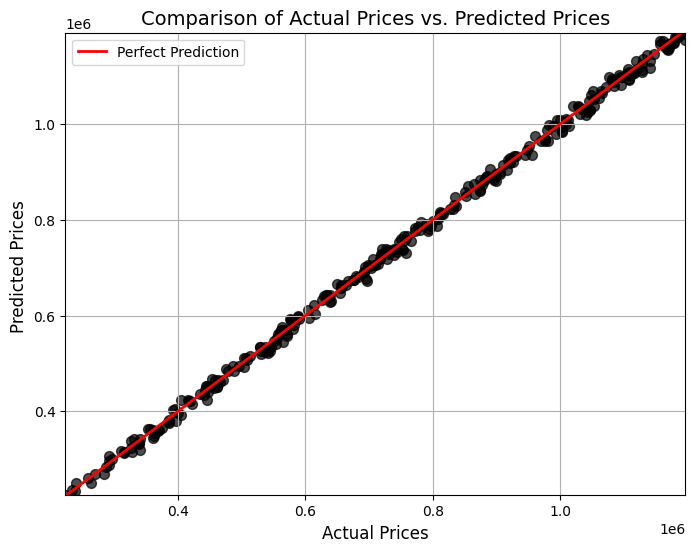

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, marker='o', s=50, alpha=0.7, color='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlim(min(y_test) - 10, max(y_test) + 10)
plt.ylim(min(y_pred) - 10, max(y_pred) + 10)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices ', fontsize=12)
plt.title('Comparison of Actual Prices vs. Predicted Prices', fontsize=14)
plt.grid(True)
plt.legend()
plt.savefig('actual_vs_predicted_prices.png', dpi=300)
plt.show()

# **REPORT SUMMARY**
In this analysis, we conducted an exploratory data analysis (EDA) to explore how various features relate to house prices. We used scatter plots, histograms, and a correlation matrix to visualize the data, helping us spot any underlying patterns.

Next, we focused on data preprocessing, where we handled missing values, normalized the features, and ensured that all variables were in a numerical format. We then built a multiple regression model using Scikit-learn, splitting the dataset into 70% for training and 30% for testing.

To assess the model's performance, we looked at metrics like Mean Squared Error (MSE) and R-squared. Additionally, we analyzed the model coefficients to understand the impact of each predictor. A comparison between predicted and actual prices was also visualized to check the model’s accuracy.

Throughout the process, we encountered challenges like the need for proper normalization and addressing outliers in the data. However, we were able to manage these effectively by carefully preprocessing the data and using various visualization techniques.